# Final Project
By James Kobelenz

## Acknowledgements
Part of the code of this project was implemented from [Diffractio and their examples](https://diffractio.readthedocs.io/en/latest/index.html).
Diffractio is a python library that handles most of the refraction and reflection computation and plotting.

# Problem
In chapter 6 of Classical Electromagnetic Radiation by Heald and Marion, we were introduced to refraction and reflection of eletromagnetic waves off of dielectric media. This chapter exaplained why diamonds are so bright, which is because of the their high index of refraction.  

The image below shows a brilliant round cut diamond with a beam of light entering through the table (top) of the diamond, reflecting and refracting off of the surfaces. Eventually the beam separates into its spectural components due to refration and are plotted seperately. 
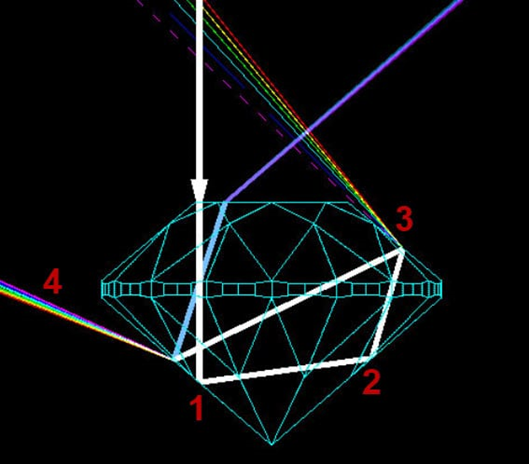
<center>Image Source: https://www.igi.org/gemblog/cut-quality-cliffsnotes-for-diamonds/</center>

The main idea for of this project is to replicate this image in Python, but to shine the beam of light onto different faces of the diamond and see what the light's path looks like. 



# Model 
During the development of this project, I ended up making multiple models of a 2D-slice of diamond. 

The image below shows the dimensions and proportions of an ideal brilliant round cut diamond. These proportions are used to create a 2D slice of a diamond. 

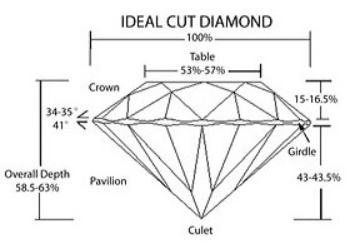
<center>https://www.b2cjewels.com/education/diamond-cut-guide</center>

My first attempt was in Google Colab using gmsh and multiphenics to create and plot the mesh. After diggning around in the dolfinx and multifenics documentation, I was a bit intimidated and looked for a more simple starting point.

I ended up using Geogebra to create a 2D polygon of the diamond model, which was helpful for quickly visualizing how rays would reflect and refract when they encounted the diamond. The main issue I had with Geogebra was that it does not organize variables well and does not have the downward flow of operation like that of a coding script. This made it difficult to make set conditions for angles and also prevented any outside library usage.  

Finally, I went back to base python within the Jupyter Notebooks and plotted the diamond slice with matplotib, which is generated in the cell below. 


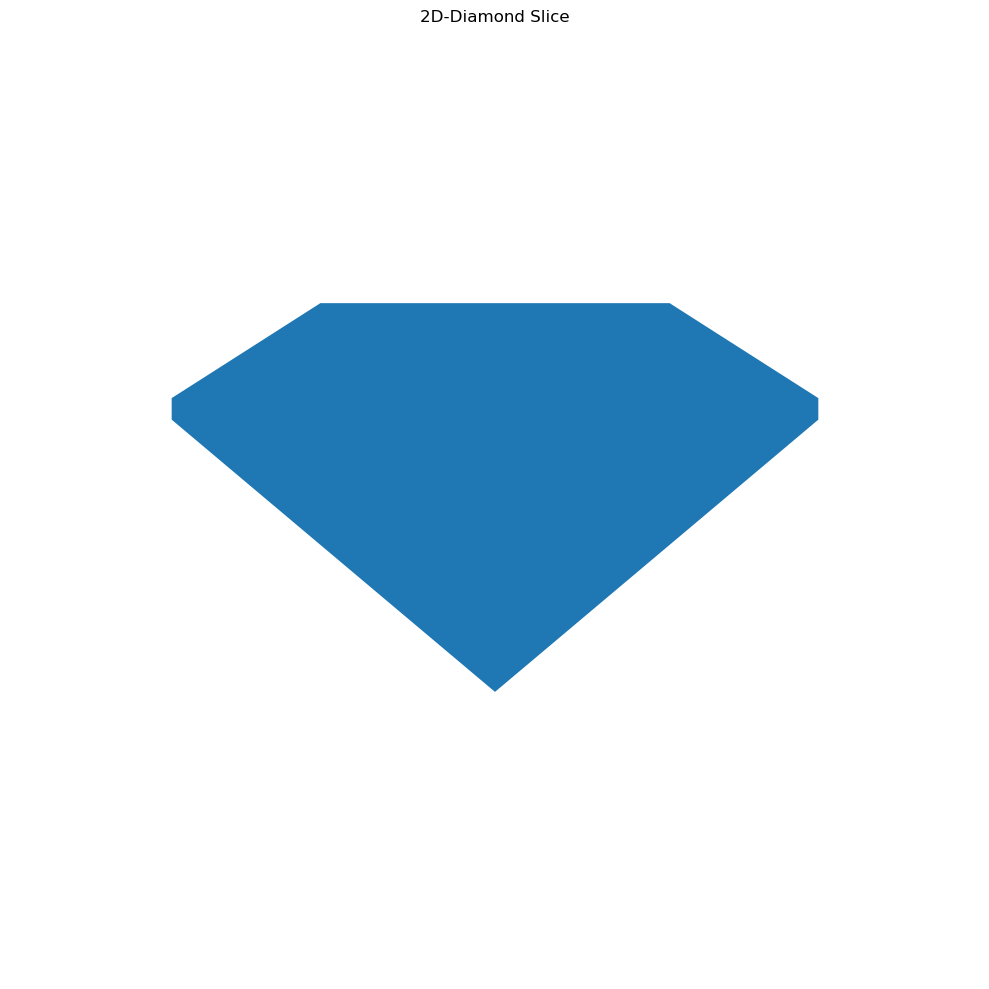

In [422]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

## Parameters
# Diamond Proportions
diameter = 1 # 100%
table = 0.54*diameter # 54%
girdle = 0.034*diameter # 3.4%
depth = 0.593*diameter # 59.3%
crown_height = 0.15*diameter # 15%
pavillion_height = 0.43*diameter # 43%
# crown_angle = np.radians(34.5)
# pavillion_angle = np.radians(40.75)

# Give variables shorter names
h_crown = crown_height
h_pavillion = pavillion_height

# Exterior Index of Refraction (Vacuum)
n1 = 1

# Interior Index of refraction (Diamond)
n2 = 2.3

# Define Origin
x0 = 0
y0 = 0

# Create Diamond Points with vectors
point1 = [x0, y0-depth/2]
point2 = [x0-diameter/2, y0-depth/2+h_pavillion]
point3 = [x0-diameter/2, y0-depth/2+h_pavillion+girdle,]
point4 = [x0-table/2, y0-depth/2+h_pavillion+girdle+h_crown]
point5 = [x0+table/2, y0-depth/2+h_pavillion+girdle+h_crown]
point6 = [x0+diameter/2, y0-depth/2+h_pavillion+girdle]
point7 = [x0+diameter/2, y0-depth/2+h_pavillion]

# Fill lists with points
x_values = [point1[0], point2[0], point3[0], point4[0], point5[0], point6[0], point7[0], point1[0]]
y_values = [point1[1], point2[1], point3[1], point4[1], point5[1], point6[1], point7[1], point1[1]]

# Plot slice and save image as 'diamond.png'
plt.figure(dpi=100)
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.fill(x_values, y_values)
plt.axis('off')
plt.savefig('diamond.png')
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("2D-Diamond Slice")
plt.show()

# Relevent Equations
Below are the some of the equations we've studied in Chapter 6. These equtions are used throughout the many functions and definitions within the Diffractio library.

## Snell's Law
$$ n_1\sin(\theta_1)=n_2\sin(\theta_2) $$

## Parallel Polarization
### Reflection Coefficient

$$ R_\parallel = \frac{\tan^2(\theta_2-\theta_0)}{\tan^2(\theta_2+\theta_0)} $$

### Transmition Coefficient

$$ T_\parallel = \frac{\sin(2\theta_0)\sin(2\theta_2)}{\sin^2(\theta_0+\theta_0)\cos^2((\theta_0-\theta_2))} $$

## Perpendicular  Polarization
### Reflection Coefficient

$$ R_\perp = \frac{\sin^2(\theta_2-\theta_0)}{\sin^2(\theta_2+\theta_0)} $$

### Transmition Coefficient

$$ T_\perp = \frac{\sin(2\theta_0)\sin(2\theta_2)}{\sin^2(\theta_0+\theta_2))} $$

## Unpolarized Light
### Mean Reflection Coefficient
$$ R_M = \frac{(R_\perp + R_\parallel)}{2} $$

## Degree of polarization
$$ P(\theta_0) = \frac{R_\perp - R_\parallel}{R_\perp + R_\parallel} $$

## Total Internal Reflection
Two conditions must be met for Total Internal Reflection (TIR):

* Incident wave must be in denser media traveling towards less dense media (i.e. $ n_1 > n_2$)
* Incident angle of wave must be greater than or equal to the critical angle. (i.e. $ \theta_c = \sin^{-1}(\frac{n_2}{n_1}) $)
   
### Critical Angle
$$ \theta_c = \sin^{-1}(\frac{n_2}{n_1}) $$

# Computation
As mentioned in the "Acknowlegements" section, Diffractio is a python library that handles most of the refraction and reflection computation and plotting. The following cells use the image saved earlier to genarate the region of the diamond and the exterior region with their respective indecies of refration.


In [423]:
# Import Libraries
import matplotlib.cm as cm
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_X import Scalar_source_X

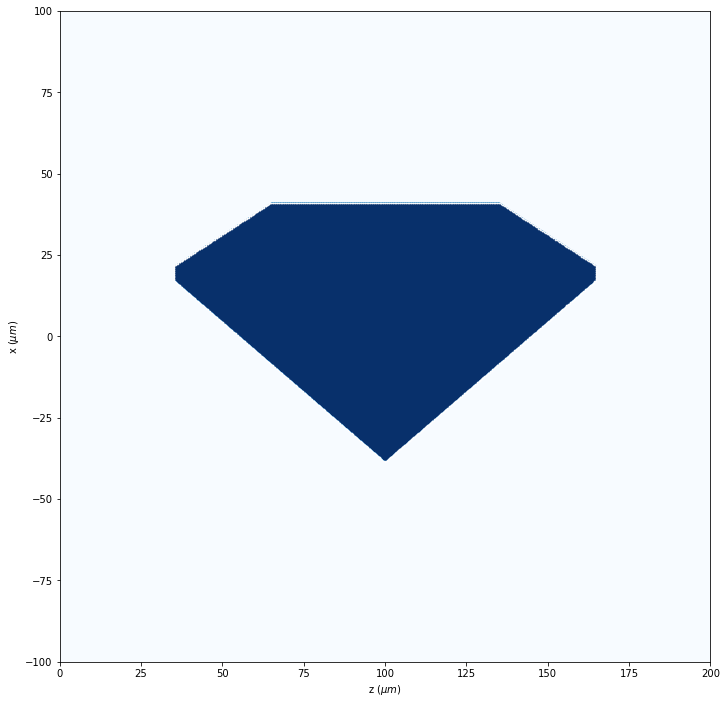

In [424]:
# Create a grid with micrometer units
x0 = np.linspace(-100 * um, 100 * um, 1000)
z0 = np.linspace(0 * um, 200 * um, 1000)

#Define wavelength of incident beam of light
wavelength = 0.380 * um
#
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=5, x0=80 * um, z0=0 * um, w0=10 * um, theta=-45. * degrees)

# Uncomment this line to see what a planewave looks like 
# u0.plane_wave(A=1, theta=90 * degrees)

#Use saved image
filename = "diamond.png"

# Define region or "mask" based on image
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.image(filename=filename, n_max=n2, n_min=n1, angle=180 * degrees, invert=False)
u1.draw_refraction_index(scale='scaled')

In [425]:
# Define edges with surface detection fuction
edges = u1.surface_detection()

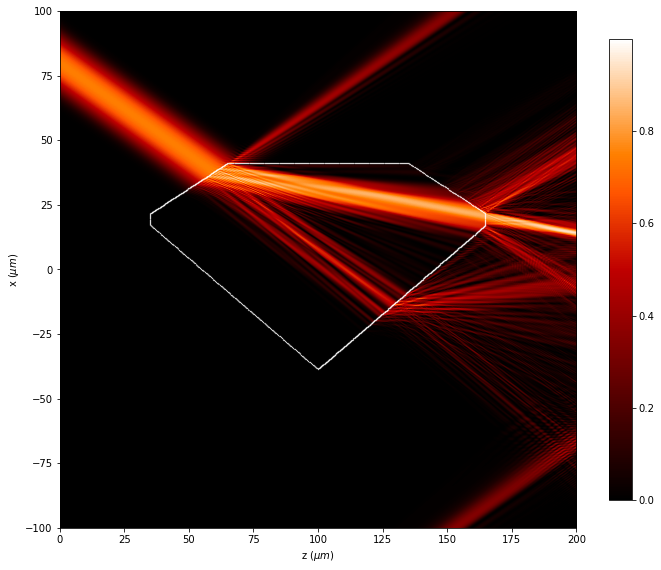

In [426]:
# Plot beam of light 
u1.clear_field()
u1.BPM(verbose=False, has_edges=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges,
        scale='scaled',
        colorbar_kind="vertical",
        colormap_kind="gist_heat") #Can change color map to different schemes for cool patterns


# Results
## Red Light
### Parameters
* wavelength = 0.700 um (Violet)
* Amplitude (A) = 5
* x0 = 80 um
* z0 = 0 um
* w0 = 10 um
* theta = -45
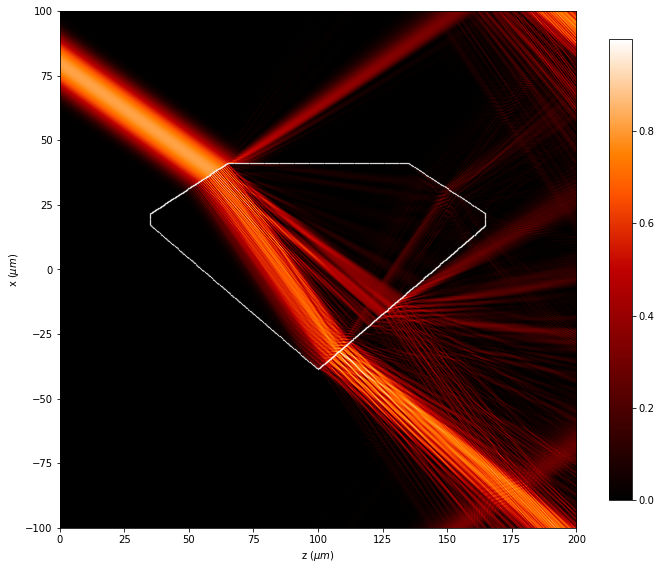

## Violet Light
Note: While the light still looks red (because of the colormap "gist_heat"), the wavelength has been reduced to that of violet light.
### Parameters
* wavelength = 0.380 um (Violet)
* Amplitude (A) = 5
* x0 = 80 um
* z0 = 0 um
* w0 = 10 um
* theta = -45 $^{\circ}$
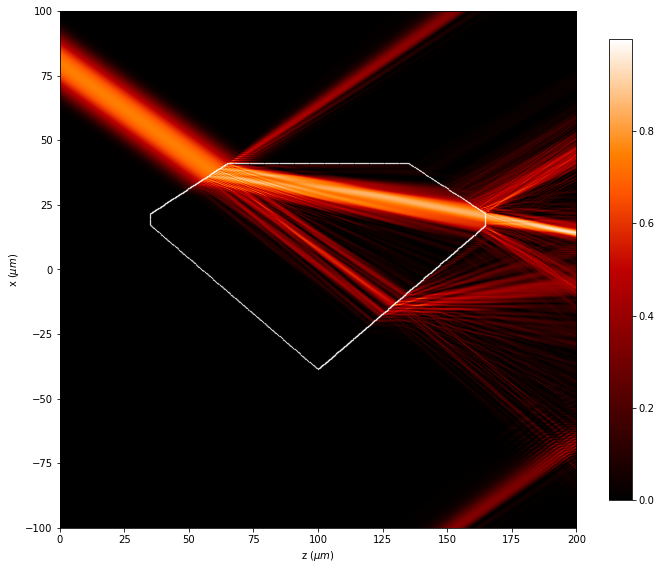


# Analysis
When the beam of red light hits the crown surface, it refracts downward and slightly left, leaking out the bottom of the diamond. However, when the wavelength is changed to that of violet light, it actually bends to the right more and escapes via the girdle surface.

I expected to see some kind of reflection that travels to the left, however it seems the simulation for the Gaussian beam only moves left to right and won't plot any beams that reflected the opposite direction. This means that this simulation is not very accurate to what theory would suggest. However, there are many different settings and simulations to try within the Diffractio library, so there is probaby one that is accurate out there.

The simulation also has looped top and bottom borders meaning that a beam that travels into the top border will appear at the bottom and continue its path

Since we used an image to define the new region in Deffractio, the diamond is actually extremely small, only about 150 micrometers in diameter.  

# Summary
Overall, this experiment has led to the following conclusions:
* The Gaussian beam only travels from left to right, missing some of the reflection patterns that would normally be seen.
* Upon hitting the crown surface, red light refracted to the right leaking out the bottom of the diamond, while violet light refracted to the right towards the girdle.
* The diamond in the simulation is actually extremely small, approximately 150 micrometers in diameter.

### Future Work
If I were continue working on this project, I would try to plot 2D-slices of other diamond cuts such as the heart or princess cuts seen below.
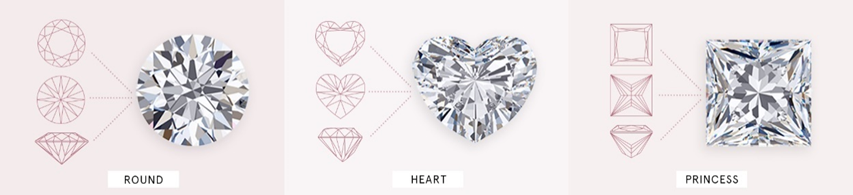
<center>Image Source: https://www.kay.com/different-diamond-shapes</center>

I plan to mess around and learn more about the Diffractio library such as simulations with ploychromatic light or different beam types (e.g. laguerre beams, hermite gauss beams, zernike beams, bessel beams).

I might also try different libraries such as the MEEP library now that I have better knowledge of installing python packages. 
